# Gapminder

## データ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gapminder import gapminder

In [2]:
df = gapminder
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [369]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [371]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


**含まれる国名**

In [372]:
countries = df.loc[:,'country'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

**国数**

In [373]:
len(countries)

142

**`continent`の内訳**

In [374]:
df.loc[:,'continent'].unique().sort()
# .sort().tolist()

In [375]:
# continentのリスト
continent_list = df.loc[:,'continent'].unique().tolist()

# 国数を入れる空のリスト
num_countries = []

for i in continent_list:
    # 条件
    con = df.loc[:,'continent'] == i
    #　条件が満たされる行を抽出
    series_countries = df.loc[con,'country']
    # 重複をなくす
    series_countries_unique = series_countries.unique()
    # 国数を数える
    num = len(series_countries_unique)
    # 上のリストに追加
    num_countries.append(num)

In [376]:
print(continent_list,'\n',num_countries)

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'] 
 [33, 30, 52, 25, 2]


In [377]:
sum(num_countries)

142

## `groupby()`

In [3]:
df_group = df.groupby('continent')

In [4]:
from see import *
see(df_group)

    .*               []               <                <=               ==
    !=               >                >=               dir()            hash()
    iter()           len()            repr()           str()
    unicode()        .agg()           .aggregate()     .all()           .any()
    .apply()         .backfill()      .bfill()         .boxplot()
    .continent       .corr()          .corrwith()      .count()
    .country         .cov()           .cumcount()      .cummax()
    .cummin()        .cumprod()       .cumsum()        .describe()
    .diff()          .dtypes          .expanding()     .ffill()
    .fillna()        .filter()        .first()         .gdpPercap
    .get_group()     .groups          .head()          .hist()
    .idxmax()        .idxmin()        .indices         .last()
    .lifeExp         .mad()           .max()           .mean()
    .median()        .min()           .ndim            .ngroup()
    .ngroups         .nth()           .nunique()       .ohlc

### `continent`の内訳（again）

In [382]:
# Seriesを返す

country_names = df_group['country'].unique()
country_names

continent
Africa      [Algeria, Angola, Benin, Botswana, Burkina Fas...
Americas    [Argentina, Bolivia, Brazil, Canada, Chile, Co...
Asia        [Afghanistan, Bahrain, Bangladesh, Cambodia, C...
Europe      [Albania, Austria, Belgium, Bosnia and Herzego...
Oceania                              [Australia, New Zealand]
Name: country, dtype: object

In [383]:
N = len(country_names)

for i in range(N):
    t0 = country_names[i]
    t1 = len(t0)
    print(country_names.index[i],':',t1)

Africa : 52
Americas : 25
Asia : 33
Europe : 30
Oceania : 2


### 統計量

In [384]:
three_vars=['lifeExp','pop','gdpPercap']

#### データ数

In [385]:
df_group.count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


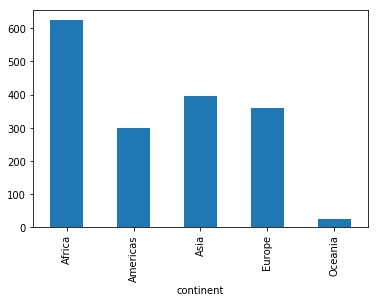

In [386]:
df_group.size().plot(kind='bar')
pass

#### 平均

In [387]:
df_group[three_vars].mean()

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,9.916003e+06,2193.754578
Americas,64.658737,2.450479e+07,7136.110356
Asia,60.064903,7.703872e+07,7902.150428
Europe,71.903686,1.716976e+07,14469.475533
Oceania,74.326208,8.874672e+06,18621.609223


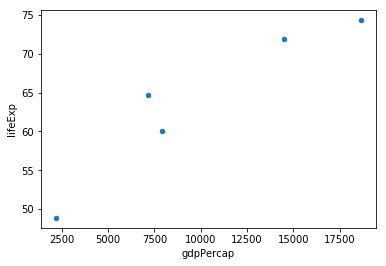

In [388]:
df_group.mean().plot(kind='scatter', x='gdpPercap', y='lifeExp')
pass

#### 標準偏差

In [389]:
df_group[three_vars].std()

,lifeExp,pop,gdpPercap
continent,,,
Africa,9.150210,1.549092e+07,2827.929863
Americas,9.345088,5.097943e+07,6396.764112
Asia,11.864532,2.068852e+08,14045.373112
Europe,5.433178,2.051944e+07,9355.213498
Oceania,3.795611,6.506342e+06,6358.983321


#### 最大値

In [390]:
df_group.max()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,Zimbabwe,2007,76.442,135031164,21951.21176
Americas,Venezuela,2007,80.653,301139947,42951.65309
Asia,"Yemen, Rep.",2007,82.603,1318683096,113523.13290
Europe,United Kingdom,2007,81.757,82400996,49357.19017
Oceania,New Zealand,2007,81.235,20434176,34435.36744


#### 最小値

In [391]:
df_group.min()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,Algeria,1952,23.599,60011,241.165877
Americas,Argentina,1952,37.579,662850,1201.637154
Asia,Afghanistan,1952,28.801,120447,331.000000
Europe,Albania,1952,43.585,147962,973.533195
Oceania,Australia,1952,69.120,1994794,10039.595640


**基本的統計**

In [392]:
df_group[three_vars].describe()

lifeExp                                                             \
            count       mean        std     min       25%      50%       75%   
continent                                                                      
Africa      624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas    300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia        396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe      360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania      24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

                     pop                ...                             \
              max  count          mean  ...          75%           max   
continent                               ...                              
Africa     76.442  624.0  9.916003e+06  ...  10801489.75  1.350312e+08   
Americas   80.653  300.0  2.450479e+07  ...  18340309.00  3.011399e+08   
Asia       82.603  396.0  7.703872e+07  ...  46300348.00  1.318683e+09   
Europe     81.757  360.0  1.716976e+07  ...  21802867.00  8.240100e+07   
Oceania    81.235   24.0  8.874672e+06  ...  14351625.00  2.043418e+07   

          gdpPercap                                                          \
              count          mean           std           min           25%   
continent                                                                     
Africa        624.0   2193.754578   2827.929863    241.165877    761.247010   
Americas      300.0   7136.110356   6396.764112   1201.637154   3427.779072   
Asia          396.0   7902.150428  14045.373112    331.000000   1056.993223   
Europe        360.0  14469.475533   9355.213498    973.533195   7213.085036   
Oceania        24.0  18621.609223   6358.983321  10039.595640  14141.858698   

                                                     
                    50%           75%           max  
continent                                            
Africa      1192.138217   2377.417422   21951.21176  
Americas    5465.509853   7830.210416   42951.65309  
Asia        2646.786844   8549.255654  113523.13290  
Europe     12081.749115  20461.386162   49357.19017  
Oceania    17983.303955  22214.117110   34435.36744  

[5 rows x 24 columns]

### `groupby.agg()`

`agg()`を使うとよりメソッドだけではなく，他の関数も使える。

`()`の中に関数を入れる。

In [393]:
df_group.agg(np.mean)

,year,lifeExp,pop,gdpPercap
continent,,,,
Africa,1979.5,48.865330,9.916003e+06,2193.754578
Americas,1979.5,64.658737,2.450479e+07,7136.110356
Asia,1979.5,60.064903,7.703872e+07,7902.150428
Europe,1979.5,71.903686,1.716976e+07,14469.475533
Oceania,1979.5,74.326208,8.874672e+06,18621.609223


In [394]:
df_group[three_vars].agg([np.max, np.min, np.mean])

lifeExp                            pop                         \
             amax    amin       mean        amax     amin          mean   
continent                                                                 
Africa     76.442  23.599  48.865330   135031164    60011  9.916003e+06   
Americas   80.653  37.579  64.658737   301139947   662850  2.450479e+07   
Asia       82.603  28.801  60.064903  1318683096   120447  7.703872e+07   
Europe     81.757  43.585  71.903686    82400996   147962  1.716976e+07   
Oceania    81.235  69.120  74.326208    20434176  1994794  8.874672e+06   

              gdpPercap                              
                   amax          amin          mean  
continent                                            
Africa      21951.21176    241.165877   2193.754578  
Americas    42951.65309   1201.637154   7136.110356  
Asia       113523.13290    331.000000   7902.150428  
Europe      49357.19017    973.533195  14469.475533  
Oceania     34435.36744  10039.595640  18621.609223

In [395]:
# 自作の関数もOK

func = lambda x : (np.max(x)-np.min(x))/np.mean(x)

df_group['lifeExp','pop','gdpPercap'].agg(func)

,lifeExp,pop,gdpPercap
continent,,,
Africa,1.081401,13.611447,9.896297
Americas,0.666174,12.261971,5.850528
Asia,0.895731,17.115583,14.324219
Europe,0.530877,4.790574,3.343843
Oceania,0.162998,2.077754,1.310079


### 図

#### 時系列

**`continent`平均**

In [463]:
df_lifeExp_continent = df_group2.mean()['lifeExp'].unstack(level=0)

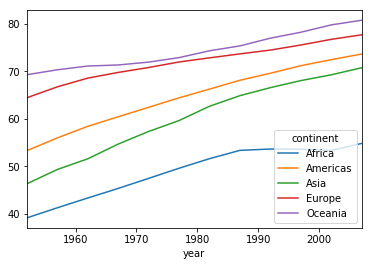

In [465]:
df_lifeExp_continent.plot()
pass

**５カ国**

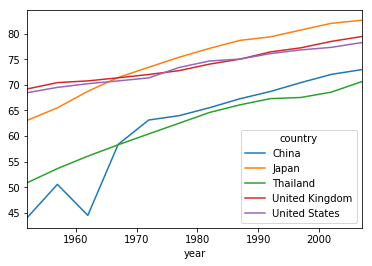

In [491]:
con = df['country'].isin(['Japan','United Kingdom', 'United States', 'China', 'Thailand'])
df.loc[con,:].pivot(index='year',columns='country',values='lifeExp').plot()
pass

#### クロス・セクション

In [456]:
df_mean = df_group.mean()
df_mean['ln_pop'] = np.log(df_mean['pop'])
df_mean['ln_gdpPercap'] = np.log(df_mean['gdpPercap'])
df_mean['lifeExp_10'] = df_mean['lifeExp']/10

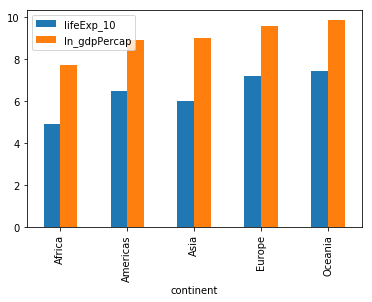

In [457]:
df_mean[['lifeExp_10', 'ln_gdpPercap']].plot(kind='bar')
pass

### 複数階層の`groupby()`

`continent`別の平均時系列を考えるときに有用。

In [398]:
df_group2 = df.groupby(['continent','year'])

In [400]:
df_group2.mean()

lifeExp           pop     gdpPercap
continent year                                       
Africa    1952  39.135500  4.570010e+06   1252.572466
          1957  41.266346  5.093033e+06   1385.236062
          1962  43.319442  5.702247e+06   1598.078825
          1967  45.334538  6.447875e+06   2050.363801
          1972  47.450942  7.305376e+06   2339.615674
          1977  49.580423  8.328097e+06   2585.938508
          1982  51.592865  9.602857e+06   2481.592960
          1987  53.344788  1.105450e+07   2282.668991
          1992  53.629577  1.267464e+07   2281.810333
          1997  53.598269  1.430448e+07   2378.759555
          2002  53.325231  1.603315e+07   2599.385159
          2007  54.806038  1.787576e+07   3089.032605
Americas  1952  53.279840  1.380610e+07   4079.062552
          1957  55.960280  1.547816e+07   4616.043733
          1962  58.398760  1.733081e+07   4901.541870
          1967  60.410920  1.922986e+07   5668.253496
          1972  62.394920  2.117537e+07   6491.334139
          1977  64.391560  2.312271e+07   7352.007126
          1982  66.228840  2.521164e+07   7506.737088
          1987  68.090720  2.731016e+07   7793.400261
          1992  69.568360  2.957096e+07   8044.934406
          1997  71.150480  3.187602e+07   8889.300863
          2002  72.422040  3.399091e+07   9287.677107
          2007  73.608120  3.595485e+07  11003.031625
Asia      1952  46.314394  4.228356e+07   5195.484004
          1957  49.318544  4.735699e+07   5787.732940
          1962  51.563223  5.140476e+07   5729.369625
          1967  54.663640  5.774736e+07   5971.173374
          1972  57.319269  6.518098e+07   8187.468699
          1977  59.610556  7.225799e+07   7791.314020
          1982  62.617939  7.909502e+07   7434.135157
          1987  64.851182  8.700669e+07   7608.226508
          1992  66.537212  9.494825e+07   8639.690248
          1997  68.020515  1.025238e+08   9834.093295
          2002  69.233879  1.091455e+08  10174.090397
          2007  70.728485  1.155138e+08  12473.026870
Europe    1952  64.408500  1.393736e+07   5661.057435
          1957  66.703067  1.459635e+07   6963.012816
          1962  68.539233  1.534517e+07   8365.486814
          1967  69.737600  1.603930e+07  10143.823757
          1972  70.775033  1.668784e+07  12479.575246
          1977  71.937767  1.723882e+07  14283.979110
          1982  72.806400  1.770890e+07  15617.896551
          1987  73.642167  1.810314e+07  17214.310727
          1992  74.440100  1.860476e+07  17061.568084
          1997  75.505167  1.896480e+07  19076.781802
          2002  76.700600  1.927413e+07  21711.732422
          2007  77.648600  1.953662e+07  25054.481636
Oceania   1952  69.255000  5.343003e+06  10298.085650
          1957  70.295000  5.970988e+06  11598.522455
          1962  71.085000  6.641759e+06  12696.452430
          1967  71.310000  7.300207e+06  14495.021790
          1972  71.910000  8.053050e+06  16417.333380
          1977  72.855000  8.619500e+06  17283.957605
          1982  74.290000  9.197425e+06  18554.709840
          1987  75.320000  9.787208e+06  20448.040160
          1992  76.945000  1.045983e+07  20894.045885
          1997  78.190000  1.112072e+07  24024.175170
          2002  79.740000  1.172741e+07  26938.778040
          2007  80.719500  1.227497e+07  29810.188275

In [403]:
df_lifeExp_group = df_group2.mean().loc[:,'lifeExp'].unstack(level=0)

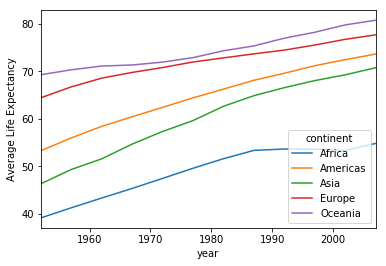

In [405]:
df_lifeExp_group.plot()
plt.ylabel('Average Life Expectancy')
pass

**世界平均との比較**

In [406]:
df_group_year = df.groupby('year')

In [407]:
world_lifeExp = df_group_year.mean()['lifeExp'].values.reshape(1,12).T

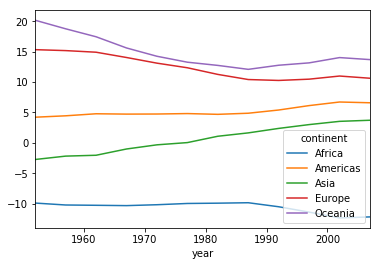

In [410]:
df_lifeExp_diff = df_lifeExp_group - world_lifeExp
df_lifeExp_diff.plot()
pass

## `Multi-index`

In [411]:
# sort_index()がないとWarningがでる場合がある(順番で並ぶとPythonが変数を探しやすくなる)

dfm = df.set_index(['continent','country','year']).sort_index()

In [412]:
dfm.head()

lifeExp       pop    gdpPercap
continent country year                                
Africa    Algeria 1952   43.077   9279525  2449.008185
                  1957   45.685  10270856  3013.976023
                  1962   48.303  11000948  2550.816880
                  1967   51.407  12760499  3246.991771
                  1972   54.518  14760787  4182.663766

`continent`, `country`, `year`の３つがインデックス！

**平均の計算**

In [413]:
dfm.loc[('Asia',),'lifeExp'].mean()

60.064903232323175

**図（５カ国の時系列）**

In [414]:
dfm_2 = dfm.droplevel(level=0,axis=0)

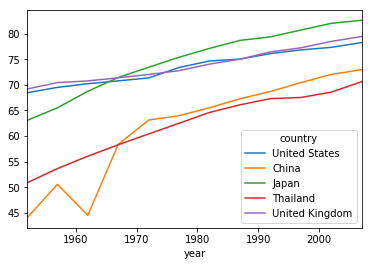

In [415]:
countries = ['Japan', 'United Kingdom', 'United States', 'China', 'Thailand']

dfm_2.loc[(countries),'lifeExp'].unstack(level=0).plot()
pass

**`lifeExp`の世界平均との差**

In [417]:
df_lifeExp_mi = pd.DataFrame()

for i in continent_list:
    temp = dfm.loc[(i,),'lifeExp'].unstack(level=0).mean(axis=1)
    df_lifeExp_mi[i] = temp

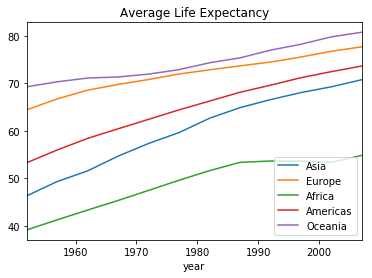

In [418]:
df_lifeExp_mi.plot()
plt.title('Average Life Expectancy')
pass

In [426]:
world_lifeExp_mi = dfm_2['lifeExp'].unstack(level=0).mean(axis=1).values.reshape(12,1)

In [427]:
df_lifeExp_diff_mi = df_lifeExp_mi - world_lifeExp_mi

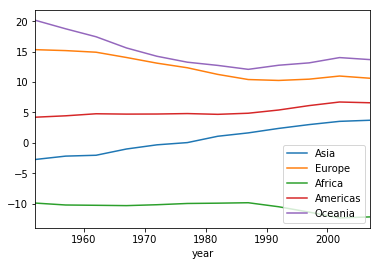

In [428]:
df_lifeExp_diff_mi.plot()
pass